## <span style="color:navy"> Esercitazione 6 </span>

### Modello di Ising 1D

Il modello di Ising monodimensionale descrive un sistema di spin disposti su un reticolo lineare, dove ogni spin può assumere valori $\pm 1$. Gli spin interagiscono solo con i primi vicini attraverso un'energia di scambio $J > 0$, che favorisce l'allineamento parallelo. L'hamiltoniana del sistema (con condizioni periodiche al contorno $S_{N+1} = S_1$) è:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$


La funzione di partizione $Z$ per il modello 1D ammette una soluzione esatta:
$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$
dove:
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
e $\beta=\frac{1}{k_b T} = \frac{1}{T}$.


Le grandezze termodinamiche si derivano da $Z$:

- **Energia interna per spin** ($h = 0$):
  $
  U(N, T) = \langle H \rangle_{h=0}
  $

- **Calore specifico** ($h = 0$):
  $
  C(N, T) = k_B \beta^2 \left( \langle H^2 \rangle_{h=0} - \langle H \rangle_{h=0}^2 \right)
  $

- **Magnetizzazione** (per $h \neq 0$, es. $h = 0.02$):
  $
  M(N, T, h) = \left\langle \sum_{i=1}^N S_i \right\rangle_{h}
  $
  Se $h = 0$, $M = 0$ per simmetria.

- **Suscettività magnetica** ($h = 0$):
  $
  \chi(N, T) = \beta \left\langle \left( \sum_{i=1}^N S_i \right)^2 \right\rangle_{h=0}
  $

### Algoritmi per il campionamento del peso di Boltzmann

Per simulare sistemi fisici secondo la distribuzione di Boltzmann è necessario adottare algoritmi in grado di campionare correttamente lo spazio delle configurazioni. Due metodi fondamentali a questo scopo sono l'**algoritmo di Metropolis** e l'**algoritmo di Gibbs**.

#### Algoritmo di Metropolis

Il Metropolis è una tecnica Monte Carlo che genera una catena di Markov: ad ogni passo si seleziona uno spin casuale e si propone di invertirlo (flip). La nuova configurazione viene accettata con una probabilità   $P_{\text{acc}} = \min\left(1, e^{-\beta \Delta E}\right)$:
- Se $\Delta E < 0$, la nuova configurazione viene sempre accettata.
- Se $\Delta E > 0$, viene accettata con probabilità $P = \exp(-\beta \Delta E)$.

Questo meccanismo consente all'algoritmo di esplorare lo spazio delle configurazioni, evitando di rimanere intrappolati in minimi locali.

#### Algoritmo di Gibbs

A differenza del Metropolis, il Gibbs accetta sempre la mossa, sceglie casualmente lo spin $S_{i}$ e propone un nuovo valore dato il contesto dei vicini $S_{i-1}$ e $S_{i+1}$ secondo la probabilità
$  P(S_i = \pm 1) = \frac{1}{1 + e^{\mp \beta \Delta E}}$ dove $\Delta E = J(s_{i-1} + s_{i+1}) + H$

Entrambi gli algoritmi permettono di generare configurazioni distribuite secondo la probabilità di Boltzmann e sono strumenti essenziali per l’analisi numerica dei sistemi statistici.


### <span style="color:teal"> Esercizio 6.1 </span>

L'obiettivo di questo esercizio è quello di simulare il modello di Ising 1D e calcolare:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

In funzione di $T$ nell'intervallo $\left[0.5;2.0\right]$ per un sistema di $N=50$ spin con $J=1$.

Innanzitutto ho arricchito il nostro codice (NSL_SIMULATOR) implementando l'algoritmo di Gibbs e il calcolo delle grandezze necessarie allo svolgimento dell'esercizio attraverso la media a blocchi, in modo da poterle calcolare con la loro incertezza associata.


Per eseguire ciascuna simulazione ho utilizzato 20 blocchi da 20000 passi ciascuno.

Nei grafici sottostanti rappresento i risultati ottenuti e li confronto con le curve teoriche ricavabili dalla soluzione esatta:

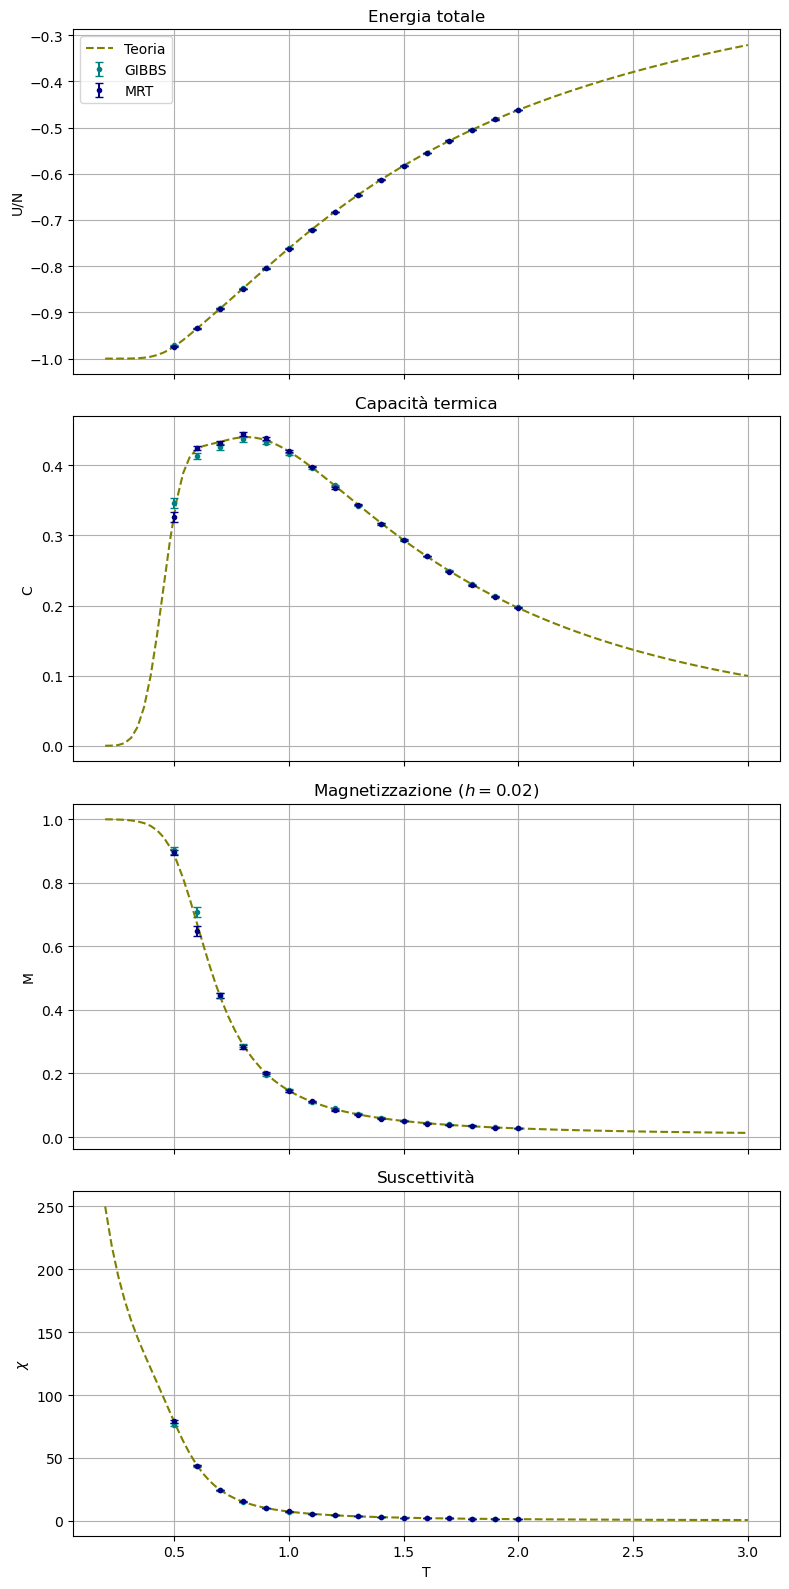

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri comuni
points = 100
T = np.linspace(0.2, 3.0, num=points)
beta = 1/T
J = 1.0
Ns = 50

# Teoria - Energia
th = np.tanh(J/T)
thN = th**Ns
ch = 1/th
e = -J * (th + ch * thN) / (1 + thN)

# Teoria - Calore specifico
heat = ((beta * J) ** 2) * (((1 + thN + (Ns - 1) * (th ** 2) + (Ns - 1) * (ch ** 2) * thN) / (1 + thN)) -
                            Ns * ((th + ch * thN) / (1 + thN)) ** 2)

# Teoria - Magnetizzazione (h ≠ 0)
h = 0.02
b = beta
coshb = np.cosh(b * h)
sinh2bJ = np.sinh(2 * b * J)
sqrt_term = np.sqrt(np.exp(2 * b * J) * coshb**2 - 2 * sinh2bJ)
l1 = np.exp(b * J) * coshb + sqrt_term
l2 = np.exp(b * J) * coshb - sqrt_term
Z = l1 ** Ns + l2 ** Ns
M = (np.exp(b * J) * np.sinh(b * h) *
     ((l1 ** (Ns - 1)) * (1 + np.exp(b * J) * coshb / sqrt_term) +
      (l2 ** (Ns - 1)) * (1 - np.exp(b * J) * coshb / sqrt_term))) / Z

# Teoria - Suscettività
X = beta * np.exp(2 * beta * J) * (1 - thN) / (1 + thN)

# ------------------ Dati sperimentali ------------------ #
# Energia
data_gibbs_E = np.loadtxt("NSL_SIMULATOR/total_energy_GIBBS.dat", delimiter=',')
Tg_E, eg, errg_E = data_gibbs_E[:, 0], data_gibbs_E[:, 1], data_gibbs_E[:, 2]
data_mrt_E = np.loadtxt("NSL_SIMULATOR/total_energy_MRT.dat", delimiter=',')
Tm_E, em, errm_E = data_mrt_E[:, 0], data_mrt_E[:, 1], data_mrt_E[:, 2]

# Calore specifico
data_gibbs_C = np.loadtxt("NSL_SIMULATOR/specific_heat_GIBBS.dat", delimiter=',')
Tg_C, cg, errg_C = data_gibbs_C[:, 0], data_gibbs_C[:, 1], data_gibbs_C[:, 2]
data_mrt_C = np.loadtxt("NSL_SIMULATOR/specific_heat_MRT.dat", delimiter=',')
Tm_C, cm, errm_C = data_mrt_C[:, 0], data_mrt_C[:, 1], data_mrt_C[:, 2]

# Magnetizzazione
data_gibbs_M = np.loadtxt("NSL_SIMULATOR/magnetization_GIBBS.dat", delimiter=',')
Tg_M, mg, errg_M = data_gibbs_M[:, 0], data_gibbs_M[:, 1], data_gibbs_M[:, 2]
data_mrt_M = np.loadtxt("NSL_SIMULATOR/magnetization_MRT.dat", delimiter=',')
Tm_M, mm, errm_M = data_mrt_M[:, 0], data_mrt_M[:, 1], data_mrt_M[:, 2]

# Suscettività
data_gibbs_X = np.loadtxt("NSL_SIMULATOR/susceptibility_GIBBS.dat", delimiter=',')
Tg_X, xg, errg_X = data_gibbs_X[:, 0], data_gibbs_X[:, 1], data_gibbs_X[:, 2]
data_mrt_X = np.loadtxt("NSL_SIMULATOR/susceptibility_MRT.dat", delimiter=',')
Tm_X, xm, errm_X = data_mrt_X[:, 0], data_mrt_X[:, 1], data_mrt_X[:, 2]

# ------------------ Plot multiplo verticale ------------------ #
fig, axs = plt.subplots(4, 1, figsize=(8, 16), sharex=True)

# Energia
axs[0].plot(T, e, color='olive', label='Teoria', linestyle='--')
axs[0].errorbar(Tg_E, eg, yerr=errg_E, fmt='o', markersize=3, label='GIBBS', color='teal', capsize=3)
axs[0].errorbar(Tm_E, em, yerr=errm_E, fmt='o', markersize=3, label='MRT', color='navy', capsize=3)
axs[0].set_title('Energia totale')
axs[0].set_ylabel('U/N')
axs[0].legend()
axs[0].grid(True)

# Calore specifico
axs[1].plot(T, heat, color='olive', label='Teoria', linestyle='--')
axs[1].errorbar(Tg_C, cg, yerr=errg_C, fmt='o', markersize=3, color='teal', label='GIBBS', capsize=3)
axs[1].errorbar(Tm_C, cm, yerr=errm_C, fmt='o', markersize=3, color='navy', label='MRT', capsize=3)
axs[1].set_title('Capacità termica')
axs[1].set_ylabel('C')
axs[1].grid(True)

# Magnetizzazione
axs[2].plot(T, M, color='olive', label='Teoria', linestyle='--')
axs[2].errorbar(Tg_M, mg, yerr=errg_M, fmt='o', markersize=3, color='teal', label='GIBBS', capsize=3)
axs[2].errorbar(Tm_M, mm, yerr=errm_M, fmt='o', markersize=3, color='navy', label='MRT', capsize=3)
axs[2].set_title('Magnetizzazione ($h=0.02$)')
axs[2].set_ylabel('M')
axs[2].grid(True)

# Suscettività
axs[3].plot(T, X, color='olive', label='Teoria', linestyle='--')
axs[3].errorbar(Tg_X, xg, yerr=errg_X, fmt='o', markersize=3, color='teal', label='GIBBS', capsize=3)
axs[3].errorbar(Tm_X, xm, yerr=errm_X, fmt='o', markersize=3, color='navy', label='MRT', capsize=3)
axs[3].set_title('Suscettività')
axs[3].set_xlabel('T')
axs[3].set_ylabel(r'$\chi$')
axs[3].grid(True)

plt.tight_layout()
plt.show()


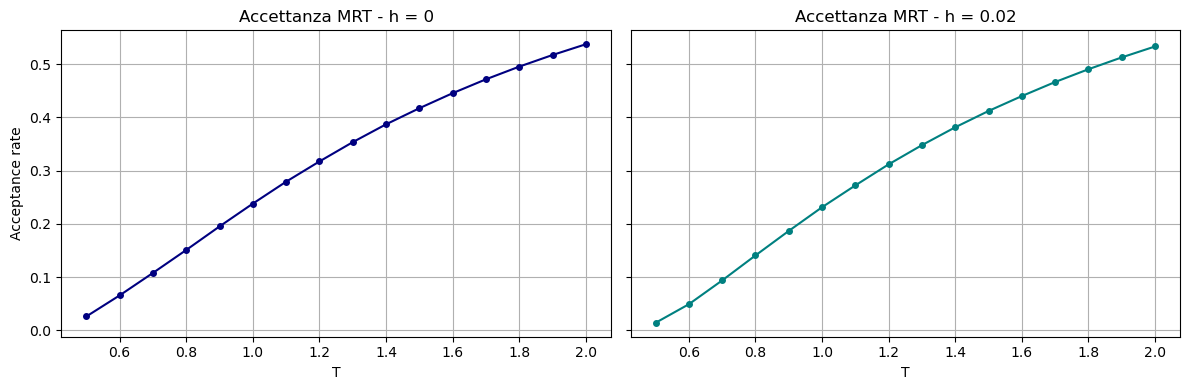

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati (tab-separated)
data_h0 = np.loadtxt("NSL_SIMULATOR/acceptance_MRT")
data_h002 = np.loadtxt("NSL_SIMULATOR/acceptance_MRT_H=0.02")

# Dati
T_h0, acc_h0 = data_h0[:, 0], data_h0[:, 1]
T_h002, acc_h002 = data_h002[:, 0], data_h002[:, 1]

# Plot a due pannelli affiancati
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# h = 0
axs[0].plot(T_h0, acc_h0, color='navy', marker='o', markersize=4)
axs[0].set_title('Accettanza MRT - h = 0')
axs[0].set_xlabel('T')
axs[0].set_ylabel('Acceptance rate')
axs[0].grid(True)

# h = 0.02
axs[1].plot(T_h002, acc_h002, color='teal', marker='o', markersize=4)
axs[1].set_title('Accettanza MRT - h = 0.02')
axs[1].set_xlabel('T')
axs[1].grid(True)

# Spaziatura e visualizzazione
plt.tight_layout()
plt.show()


In generale, si osserva che i risultati ottenuti con entrambi gli algoritmi (Metropolis e Gibbs) sono in buon accordo tra loro e con la soluzione esatta. 

Nel caso dell'algoritmo di Metropolis, ho riportato anche l’andamento dell’accettanza, che rappresenta la frazione di proposte accettate durante la simulazione. Per l’algoritmo di Gibbs, invece, questo dato non è necessario, poiché ogni aggiornamento viene accettato con probabilità 1 per costruzione.

È importante notare che, a differenza di altri casi in cui si può regolare un parametro (ad esempio l’ampiezza del passo) per ottenere un’accettanza intorno al 50%, nel caso del modello di Ising non esiste questa libertà: il flip di spin è un’operazione discreta e non modulabile, pertanto l’accettanza è determinata unicamente dalla dinamica del sistema e dalla temperatura.
